In [716]:
!echo $SHELL
!echo $PATH
!echo $JOURNAL_ROOT

/bin/zsh
/Users/tobiaspucher/miniconda3/bin:/opt/homebrew/opt/node@22/bin:/Users/tobiaspucher/miniconda3/bin:/Users/tobiaspucher/miniconda3/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/TeX/texbin:/Users/tobiaspucher/.cargo/bin:/Users/tobiaspucher/.local/bin:/Users/tobiaspucher/Library/Application Support/JetBrains/Toolbox/scripts
/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal


In [717]:
%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.ERROR)
import random
random.seed(0)
import os
os.getenv('JOURNAL_ROOT')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/Users/tobiaspucher/Library/CloudStorage/OneDrive-Personal/2025/trade_journal'

In [718]:
from src.tradecli import *
from src.utils import *
from src.journal import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [719]:
config = Config(
    include_patterns=[r'^type_1_', r'^type_3_', r'^risk_reward_ratio$', r'^side'],  
    exclude_patterns=[r'^management_strategy$'],         
    #force_values={'side': 'short', 'side': 'long'},
)

full_df = j.to_dataframe(config)
#full_df = full_df[full_df['side'] == 'long']
display(full_df)

,type_3_m30,side,type_3_d,type_3_M,type_3_h4,type_3_m1,type_3_w,type_1_m5,type_1_m30,type_1_h1,type_3_m5,type_3_m15,type_1_M,type_1_w,type_3_h1,type_1_d,type_1_m1,type_1_h4,type_1_m15
0,False,long,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
1,False,long,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,long,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,long,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,short,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False
5,False,short,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False
6,False,short,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
7,False,short,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False
8,False,short,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False
9,False,short,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [720]:
!rm -rf output
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
j.to_markdown(output_dir='output',)

In [721]:
df = j.to_dataframe(config=None)
df

,trade_uid,outcome,potential_risk_reward,TP_distance,type_3_m30,side,initial_risk_reward,type_3_d,type_3_M,potential_return,type_2_m15,type_3_h4,entry_price,type_3_m1,type_3_w,unit_test,type_1_m5,type_1_m30,rr,type_1_h1,type_3_m5,session,type_2_h1,type_2_m1,close_price,type_2_h4,initial_return,numerical_confidence,type_3_m15,type_1_M,return,account_name,type_1_w,type_2_m30,type_2_d,account,potential_price,tp_price,type_2_w,type_2_m5,SL_distance,type_3_h1,type_1_d,type_1_m1,type_2_M,entry_time,type_1_h4,type_1_m15,management_strategy,sl_price,htf_poi_ltf_confirmation,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_no_management,management_strategy_strategy_2,outcome_be,outcome_loss,outcome_win
0,1001,NaN,NaN,0.010000,False,long,2.000000,False,False,NaN,False,False,1.1000,False,False,False,False,False,NaN,False,False,new_york,False,False,NaN,False,0.010000,3.0,True,False,NaN,default,False,False,False,None,NaN,1.110000,False,False,0.005,False,False,True,False,2025-01-25 14:46:22.808734000,False,False,no_management,1.0950,False,True,False,False,False,True,False,False,False,False
1,1002,NaN,NaN,0.010000,False,long,0.666667,False,False,NaN,False,False,1.2000,False,False,False,False,False,-0.966667,False,False,new_york,True,False,1.18550,False,0.010000,2.0,False,False,-0.01450,default,False,False,False,None,NaN,1.210000,False,False,0.015,False,False,False,False,2025-01-25 14:46:22.808765000,False,False,no_management,1.1850,True,False,True,False,False,True,False,False,False,False
2,1003,NaN,NaN,0.030000,False,long,10.000000,False,False,NaN,False,False,1.3000,False,False,False,False,False,NaN,False,False,london,False,False,NaN,False,0.030000,NaN,False,False,NaN,default,False,False,False,None,NaN,1.330000,False,False,0.500,False,False,False,False,2024-12-27 10:00:01.000000000,False,False,no_management,1.2970,False,True,False,False,False,True,False,False,False,False
3,1004,NaN,5.0,0.030000,False,long,10.000000,False,False,0.015,False,False,1.3000,False,False,False,False,False,1.666667,False,False,london,False,False,1.30500,False,0.030000,4.0,False,False,0.00500,default,False,False,False,None,1.315,1.330000,False,False,0.500,False,False,False,False,2024-12-25 10:00:00.000000000,False,False,strategy_2,1.2970,False,True,False,False,False,False,True,False,False,False
4,1005,loss,NaN,-0.023222,False,short,4.644407,False,False,NaN,False,False,1.1204,True,False,True,False,False,-1.050000,False,False,tokyo,False,False,1.12565,False,-0.023222,5.0,False,False,0.00525,None,False,False,True,test_account,NaN,1.097178,False,False,-0.005,False,True,False,False,2025-01-07 01:27:23.603112923,False,False,be_after_1r,1.1254,True,False,True,True,False,False,False,False,True,False
5,1006,win,NaN,-0.049427,False,short,9.885333,False,False,NaN,True,False,1.1347,False,False,True,False,False,7.050000,True,True,tokyo,False,False,1.09945,False,-0.049427,1.0,False,False,-0.03525,None,False,False,False,test_account,NaN,1.085273,False,False,-0.005,False,False,False,False,2025-01-05 00:11:25.857897362,False,False,be_after_push,1.1397,True,False,True,False,True,False,False,False,False,True
6,1007,be,NaN,-0.032490,False,short,6.497983,False,False,NaN,False,False,1.1242,False,False,True,False,False,-0.050000,False,True,tokyo,False,False,1.12445,False,-0.032490,1.0,False,False,0.00025,None,True,False,False,test_account,NaN,1.091710,False,False,-0.005,False,False,False,True,2025-01-10 00:50:05.722141527,False,False,no_management,1.1292,False,True,False,False,False,True,False,True,False,False
7,1008,win,NaN,-0.015976,False,short,3.195198,False,False,NaN,False,False,1.1345,True,False,True,True,False,8.700000,False,False,tokyo,False,False,1.09100,False,-0.015976,2.0,False,False,-0.04350,None,False,False,True,test_account,NaN,1.118524,False,False,-0.005,False,False,False,False,2025-01-24 23:20:24.283296430,False,False,be_after_1r,1.1395,True,False,True,True,False,False,False,Fals

In [722]:
df_test = df.copy()
features = ['type_1_m5', 'type_2_m5', 'type_3_m5', 'htf_poi_ltf_confirmation', 'return']
df_test = df_test[features]
df_test = df_test.dropna()
exptected_return = df_test['return'].mean()
print('Expected return full search space:', exptected_return)
if exptected_return > 0:
    print('Expected return is positive')
else:
    print('Expected return is negative')
df_test

display(df_test.dtypes)
display(df_test.describe())
display(df_test)


report_best_performing_tags_value(df_test, y_col='return', score_mode='mean', method='brute_force')

Expected return full search space: -0.004750000000000014
Expected return is negative


type_1_m5                       bool
type_2_m5                       bool
type_3_m5                       bool
htf_poi_ltf_confirmation    category
return                       float64
dtype: object

,return
count,12.000000
mean,-0.004750
std,0.023762
min,-0.043500
25%,-0.016950
50%,-0.000475
75%,0.005025
max,0.049050


,type_1_m5,type_2_m5,type_3_m5,htf_poi_ltf_confirmation,return
1,False,False,False,True,-0.01450
3,False,False,False,False,0.00500
4,False,False,False,True,0.00525
5,False,False,True,True,-0.03525
6,False,False,True,False,0.00025
7,True,False,False,True,-0.04350
8,False,False,True,False,0.00385
9,False,False,False,True,0.00510
10,False,False,False,False,-0.00120
11,False,False,False,True,-0.02430


Best subset: ('type_1_m5',)
Best combination: (False,)
Best score: -0.0012272727272727333
Best subset: ('type_2_m5',)
Best combination: (True,)
Best score: 0.021150000000000002
Best subset: ('type_2_m5',)
Best combination: (True,)
Best score: 0.021150000000000002


In [723]:
import src.tradecli
cfg = src.tradecli.ReportOptunaConfig(study_name='default_1')
res = report_best_performing_tags_value(df_test, 
                                  y_col='return', 
                                  score_mode='mean', method='optuna', config=cfg)

  0%|          | 0/100 [00:00<?, ?it/s]

Best parameters: {'include_type_1_m5': True, 'value_type_1_m5': False, 'include_type_2_m5': True, 'value_type_2_m5': True, 'include_type_3_m5': True, 'value_type_3_m5': False, 'include_htf_poi_ltf_confirmation': False}
Best score: 0.021150000000000002


In [724]:
res

(<optuna.study.study.Study at 0x166e0cef0>,
 {'include_type_1_m5': True,
  'value_type_1_m5': False,
  'include_type_2_m5': True,
  'value_type_2_m5': True,
  'include_type_3_m5': True,
  'value_type_3_m5': False,
  'include_htf_poi_ltf_confirmation': False},
 0.021150000000000002)

In [725]:
res[0].best_trial
study = res[0]

In [726]:
# visualize stuff
import optuna
import plotly
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_slice
from optuna.visualization import plot_param_importances

# disable optuna warnings
optuna.logging.set_verbosity(optuna.logging.ERROR)

plot_optimization_history(study).show()
plot_param_importances(study).show()
plot_slice(study).show()

In [727]:
!rm -rf output/studies.md
import pprint
def markdown_report_study(study:optuna.Study, output_dir='output'):
    SECTION_OPTUNA_STUDIES = '## Optuna Studies'
    SECTION_BEST_TRIAL = f'### {study.study_name} - {study.best_trial.number}'
    GENERATION_TIME = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
    best_trial = study.best_trial
    best_trial_params = best_trial.params
    best_trial_value = best_trial.value
    best_trial_number = best_trial.number
    best_trial_number
    best_trial_params
    best_trial_value
    # add the params as nicely formatted json inside code block
    best_trial_params_str = f'''
```json
{pprint.pformat(best_trial_params)}
```
''' 
    
    best_trial_str = f'''
{SECTION_BEST_TRIAL}
- generation time: {GENERATION_TIME}
- best trial value: {best_trial_value}
- best trial params: {best_trial_params_str}
'''
    with open(f'{output_dir}/studies.md', 'a') as f:
        f.write(best_trial_str)

    
    # find the section or create it and add md link to the best trial in the study
    with open(f'{output_dir}/index.md', 'r') as f:
        lines = f.readlines()
        found = False
        for i, line in enumerate(lines):
            if SECTION_OPTUNA_STUDIES in line:
                found = True
                break
        if not found:
            lines.append(f'\n{SECTION_OPTUNA_STUDIES}\n')
        lines.append(f'- [[studies.md{SECTION_BEST_TRIAL}]]\n')
    with open(f'{output_dir}/index.md', 'w') as f:
        f.write(''.join(lines))
        

markdown_report_study(study, output_dir='output')

In [728]:
full_df = get_full_df()
#rename return column to return_points
full_df = full_df[full_df['account'] == 'test_account']
full_df = full_df.rename(columns={'return': 'return_points'})
print(np.sort(full_df.columns))
full_df

['SL_distance' 'TP_distance' 'account' 'account_name' 'close_price'
 'entry_price' 'entry_time' 'has_time_frame' 'has_type_1' 'has_type_2'
 'has_type_3' 'htf_poi_ltf_confirmation' 'htf_poi_ltf_confirmation_False'
 'htf_poi_ltf_confirmation_True' 'initial_return' 'initial_risk_reward'
 'management_strategy' 'management_strategy_be_after_1r'
 'management_strategy_be_after_push' 'management_strategy_no_management'
 'management_strategy_strategy_2' 'numerical_confidence' 'outcome'
 'outcome_be' 'outcome_loss' 'outcome_win' 'potential_price'
 'potential_return' 'potential_risk_reward' 'return_points' 'rr' 'session'
 'side' 'sl_price' 'tp_price' 'trade_uid' 'type_1_M' 'type_1_d'
 'type_1_h1' 'type_1_h4' 'type_1_m1' 'type_1_m15' 'type_1_m30' 'type_1_m5'
 'type_1_w' 'type_2_M' 'type_2_d' 'type_2_h1' 'type_2_h4' 'type_2_m1'
 'type_2_m15' 'type_2_m30' 'type_2_m5' 'type_2_w' 'type_3_M' 'type_3_d'
 'type_3_h1' 'type_3_h4' 'type_3_m1' 'type_3_m15' 'type_3_m30' 'type_3_m5'
 'type_3_w' 'unit_test']


,trade_uid,outcome,potential_risk_reward,TP_distance,type_3_m30,side,initial_risk_reward,type_3_d,type_3_M,potential_return,type_2_m15,type_3_h4,entry_price,type_3_m1,type_3_w,unit_test,type_1_m5,type_1_m30,rr,type_1_h1,type_3_m5,session,type_2_h1,type_2_m1,close_price,type_2_h4,initial_return,numerical_confidence,type_3_m15,type_1_M,return_points,account_name,type_1_w,type_2_m30,type_2_d,account,potential_price,tp_price,type_2_w,type_2_m5,SL_distance,type_3_h1,type_1_d,type_1_m1,type_2_M,entry_time,type_1_h4,type_1_m15,management_strategy,sl_price,htf_poi_ltf_confirmation,htf_poi_ltf_confirmation_False,htf_poi_ltf_confirmation_True,management_strategy_be_after_1r,management_strategy_be_after_push,management_strategy_no_management,management_strategy_strategy_2,outcome_be,outcome_loss,outcome_win,has_type_1,has_type_2,has_type_3,has_time_frame
4,1005,loss,NaN,-0.023222,False,short,4.644407,False,False,NaN,False,False,1.1204,True,False,True,False,False,-1.05,False,False,tokyo,False,False,1.12565,False,-0.023222,5.0,False,False,0.00525,None,False,False,True,test_account,NaN,1.097178,False,False,-0.005,False,True,False,False,2025-01-07 01:27:23.603112923,False,False,be_after_1r,1.1254,True,False,True,True,False,False,False,False,True,False,True,True,True,False
5,1006,win,NaN,-0.049427,False,short,9.885333,False,False,NaN,True,False,1.1347,False,False,True,False,False,7.05,True,True,tokyo,False,False,1.09945,False,-0.049427,1.0,False,False,-0.03525,None,False,False,False,test_account,NaN,1.085273,False,False,-0.005,False,False,False,False,2025-01-05 00:11:25.857897362,False,False,be_after_push,1.1397,True,False,True,False,True,False,False,False,False,True,True,True,True,False
6,1007,be,NaN,-0.032490,False,short,6.497983,False,False,NaN,False,False,1.1242,False,False,True,False,False,-0.05,False,True,tokyo,False,False,1.12445,False,-0.032490,1.0,False,False,0.00025,None,True,False,False,test_account,NaN,1.091710,False,False,-0.005,False,False,False,True,2025-01-10 00:50:05.722141527,False,False,no_management,1.1292,False,True,False,False,False,True,False,True,False,False,True,True,True,False
7,1008,win,NaN,-0.015976,False,short,3.195198,False,False,NaN,False,False,1.1345,True,False,True,True,False,8.70,False,False,tokyo,False,False,1.09100,False,-0.015976,2.0,False,False,-0.04350,None,False,False,True,test_account,NaN,1.118524,False,False,-0.005,False,False,False,False,2025-01-24 23:20:24.283296430,False,False,be_after_1r,1.1395,True,False,True,True,False,False,False,False,False,True,True,True,True,False
8,1009,loss,NaN,-0.044379,False,short,8.875786,False,False,NaN,False,False,1.1132,False,False,True,False,False,-0.77,False,True,tokyo,False,False,1.11705,False,-0.044379,1.0,False,True,0.00385,None,False,False,False,test_account,NaN,1.068821,True,False,-0.005,False,False,False,False,2025-01-12 23:58:56.190823963,False,False,be_after_push,1.1182,False,True,False,False,True,False,False,False,True,False,True,True,True,False
9,1010,loss,NaN,-0.009123,False,short,1.824689,False,True,NaN,False,False,1.1335,False,False,True,False,False,-1.02,False,False,tokyo,False,False,1.13860,False,-0.009123,2.0,False,True,0.00510,None,False,True,False,test_account,NaN,1.124377,False,False,-0.005,False,False,False,False,2025-01-05 00:58:51.544468002,False,False,be_after_1r,1.1385,True,False,True,True,False,False,False,False,True,False,True,True,True,False
10,1011,loss,NaN,0.044455,False,long,8.890933,False,False,NaN,False,False,1.1128,False,True,True,False,False,-0.24,False,False,tokyo,True,False,1.11160,False,0.044455,5.0,False,False,-0.00120,None,False,False,False,test_account,NaN,1.157255,False,False,0.005,False,False,True,False,2025-01-22 01:21:14.598694243,False,False,be_after_1r,1.1078,False,True,False,True,False,False,False,False,True,False,True,True,True,False
11,1012,win,NaN,-0.008707,False,short,1.741357,False,False,NaN,False,False,1.1280,False,False,True,False,True,4.86,False,False,tokyo,False,False,1.10370,False,-0.008707,2.0,False,False,-0

In [729]:
from analysis import *

perform_anova(full_df, dependent_var='return_points', independent_var='htf_poi_ltf_confirmation')

,sum_sq,df,F,PR(>F)
C(htf_poi_ltf_confirmation),0.000140,1.0,0.190524,0.674022
Residual,0.005881,8.0,NaN,NaN


## Independent Variables influence on dependent Variable - Win

In [730]:
calculate_performance_metrics(full_df)

Total Trades                     10.00000
Total Return                     -0.04750
Average Return                   -0.00475
Max Return Drawdown               0.07575
Total Risk Reward Ratio          25.94000
Average Risk Reward Ratio         2.59400
Max Risk Reward Ratio             9.81000
Min Risk Reward Ratio            -1.35000
Win Rate (%)                      0.40000
Average Win RR                    7.60500
Max Win RR                        9.81000
Min Win RR                        4.86000
Loss Rate (%)                     0.50000
Average Loss RR                  -0.88600
Max Loss RR                      -1.35000
Min Loss RR                      -0.24000
Breakeven Trades                  1.00000
Breakeven Rate (%) (|rr|<0.2)     0.10000
dtype: float64

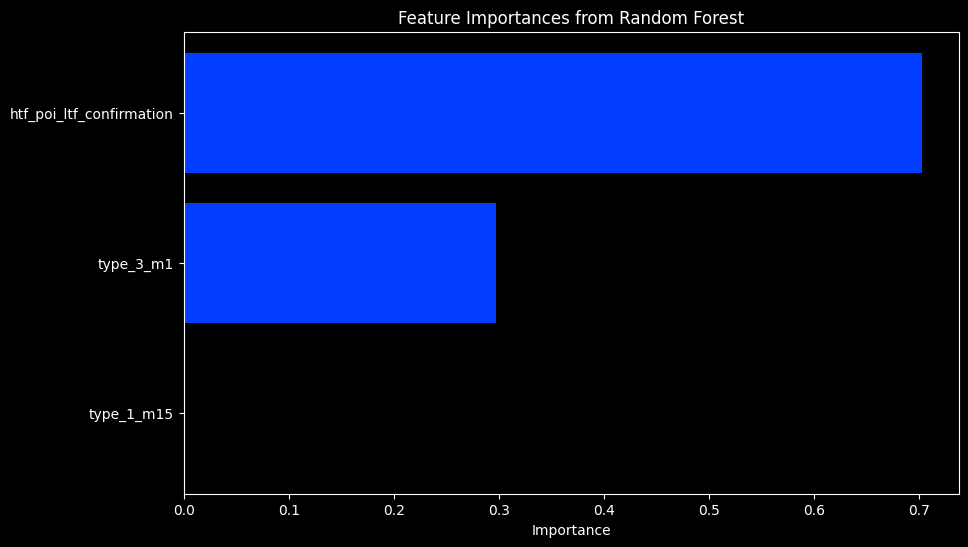

In [731]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# Define features and target
X = full_df[['type_3_m1', 'type_1_m15', 'htf_poi_ltf_confirmation']]
y = full_df['outcome']

# Initialize and fit the model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort and plot
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()

plt.show()